### 原始Corpus

19世纪théatre语料库总字数: 260301
20世纪théatre语料库总字数: 218290
19世纪journal语料库总字数: 262460
20世纪journal语料库总字数: 850373


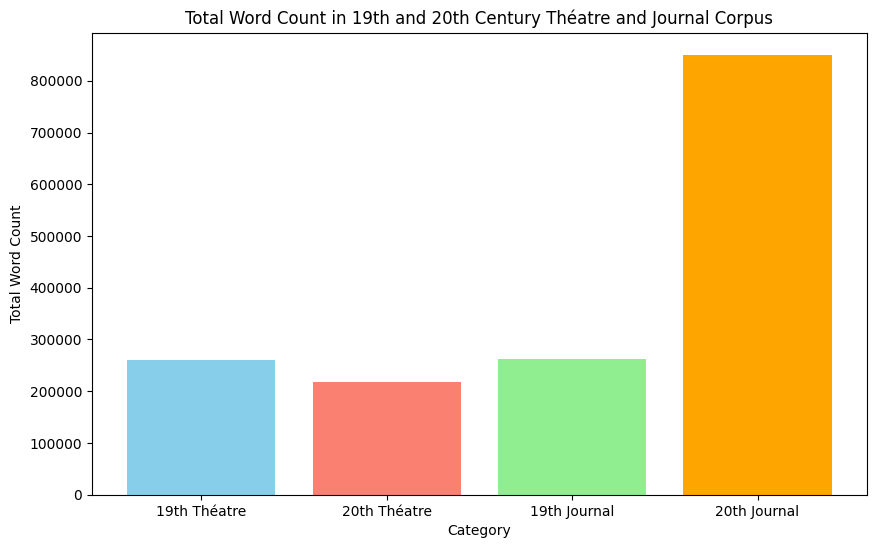

In [2]:
import os
import matplotlib.pyplot as plt

def count_total_words(corpus_path):
    """
    Compte le nombre total de mots dans le corpus.

    :param corpus_path : chemin du corpus
    :return : Nombre total de mots dans le corpus.
    """
    total_words = 0
    
    for root, dirs, files in os.walk(corpus_path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read()
                    words = text.split()
                    total_words += len(words)
    
    return total_words

# 主程序
if __name__ == "__main__":
    # 替换为19世纪和20世纪语料库路径
    corpus_19_theatre_path = 'Theatre/19'
    corpus_20_theatre_path = 'Theatre/20'
    corpus_19_journal_path = 'Journal/19'
    corpus_20_journal_path = 'Journal/20'
    
    # 统计总字数
    total_words_19_theatre = count_total_words(corpus_19_theatre_path)
    total_words_20_theatre = count_total_words(corpus_20_theatre_path)
    total_words_19_journal = count_total_words(corpus_19_journal_path)
    total_words_20_journal = count_total_words(corpus_20_journal_path)
    
    # 打印总字数
    print(f"19世纪théatre语料库总字数: {total_words_19_theatre}")
    print(f"20世纪théatre语料库总字数: {total_words_20_theatre}")
    print(f"19世纪journal语料库总字数: {total_words_19_journal}")
    print(f"20世纪journal语料库总字数: {total_words_20_journal}")
    
    # 绘制柱状图
    categories = ['19th Théatre', '20th Théatre', '19th Journal', '20th Journal']
    word_counts = [total_words_19_theatre, total_words_20_theatre, total_words_19_journal, total_words_20_journal]

    plt.figure(figsize=(10, 6))
    plt.bar(categories, word_counts, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
    plt.xlabel('Category')
    plt.ylabel('Total Word Count')
    plt.title('Total Word Count in 19th and 20th Century Théatre and Journal Corpus')
    plt.show()


### Normalisation:théatre


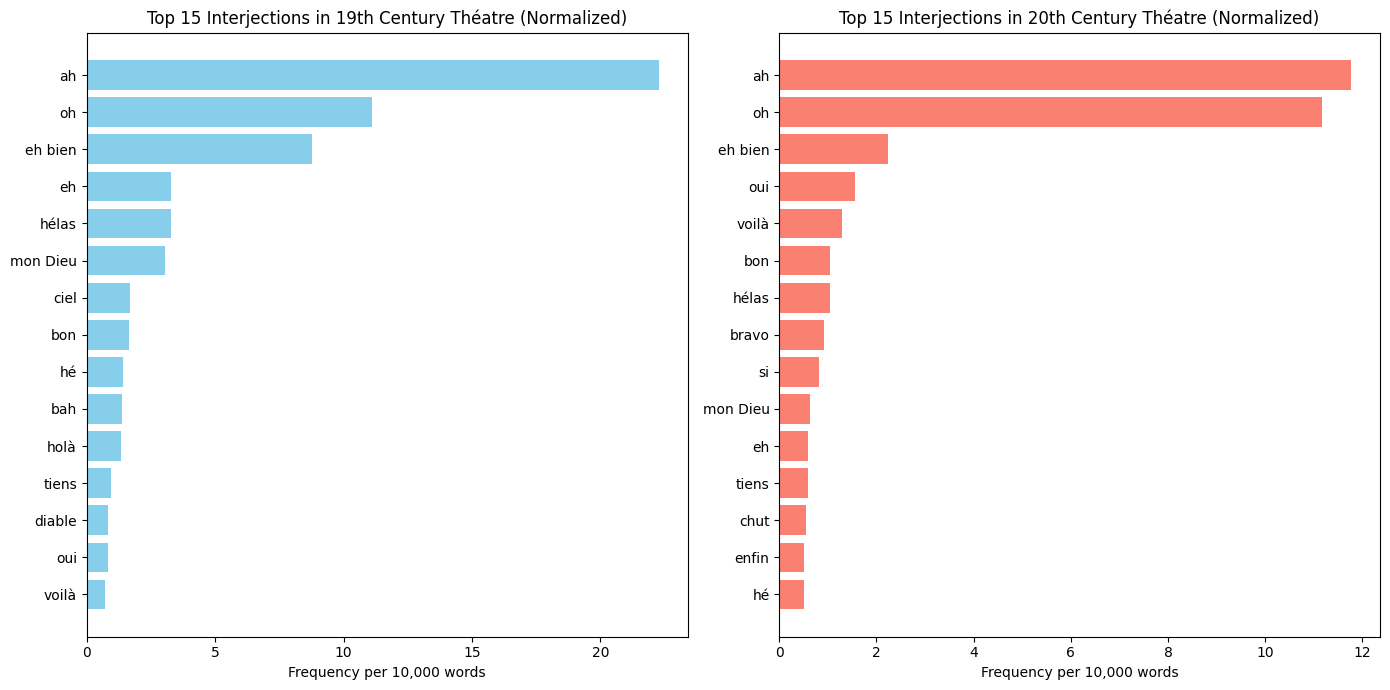

In [4]:
import os
import re
import csv
import matplotlib.pyplot as plt
from collections import Counter

# 读取感叹词字典
def load_interjections(dictionary_path):
    interjections = []
    with open(dictionary_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)  # 跳过头行
        for row in reader:
            if row:
                interjections.append(row[0].strip())  # 获取第一列并去除多余的空格
    return interjections

# 统计感叹词频率
def count_interjections(corpus_path, interjections):
    counter = Counter()
    total_words = 0
    
    for root, dirs, files in os.walk(corpus_path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read().lower()
                    words = text.split()
                    total_words += len(words)
                    
                    for word in interjections:
                        # 使用正则表达式匹配整个感叹词
                        regex = r'(?<!\w)\b{}\b\s*!'.format(re.escape(word.lower()))
                        
                        matches = re.findall(regex, text)
                        
                        # 增加匹配到的感叹词数量
                        counter[word] += len(matches)
    
    return counter, total_words

# 绘制标准化频率的柱状图
def plot_normalized_frequencies(counter_19, counter_20, total_words_19, total_words_20, top_n=15):
    # 标准化为每10,000字的频率
    normalized_19 = {word: (count / total_words_19) * 10000 for word, count in counter_19.items()}
    normalized_20 = {word: (count / total_words_20) * 10000 for word, count in counter_20.items()}
    
    common_19 = Counter(normalized_19).most_common(top_n)
    common_20 = Counter(normalized_20).most_common(top_n)
    
    # 检查是否有足够的数据绘制图表
    if not common_19 or not common_20:
        print("没有足够的数据来绘制图表。请检查感叹词列表和语料库内容。")
        return

    labels_19, counts_19 = zip(*common_19)
    labels_20, counts_20 = zip(*common_20)
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    
    ax[0].barh(labels_19, counts_19, color='skyblue')
    ax[0].set_title('Top 15 Interjections in 19th Century Théatre (Normalized)')
    ax[0].invert_yaxis()
    ax[0].set_xlabel('Frequency per 10,000 words')
    
    ax[1].barh(labels_20, counts_20, color='salmon')
    ax[1].set_title('Top 15 Interjections in 20th Century Théatre (Normalized)')
    ax[1].invert_yaxis()
    ax[1].set_xlabel('Frequency per 10,000 words')
    
    plt.tight_layout()
    plt.show()

# 主程序
if __name__ == "__main__":
    interjections_path = 'interjection_stat.csv'  # 替换为感叹词字典文件的路径
    corpus_19_theatre_path = 'Theatre/19'  # 替换为19世纪théatre语料库路径
    corpus_20_theatre_path = 'Theatre/20'  # 替换为20世纪théatre语料库路径
    
    # 读取感叹词字典
    interjections = load_interjections(interjections_path)
    
    # 统计感叹词在19世纪和20世纪théatre语料库中的频率
    counter_19, total_words_19 = count_interjections(corpus_19_theatre_path, interjections)
    counter_20, total_words_20 = count_interjections(corpus_20_theatre_path, interjections)
    
    # 绘制标准化频率的柱状图
    plot_normalized_frequencies(counter_19, counter_20, total_words_19, total_words_20)


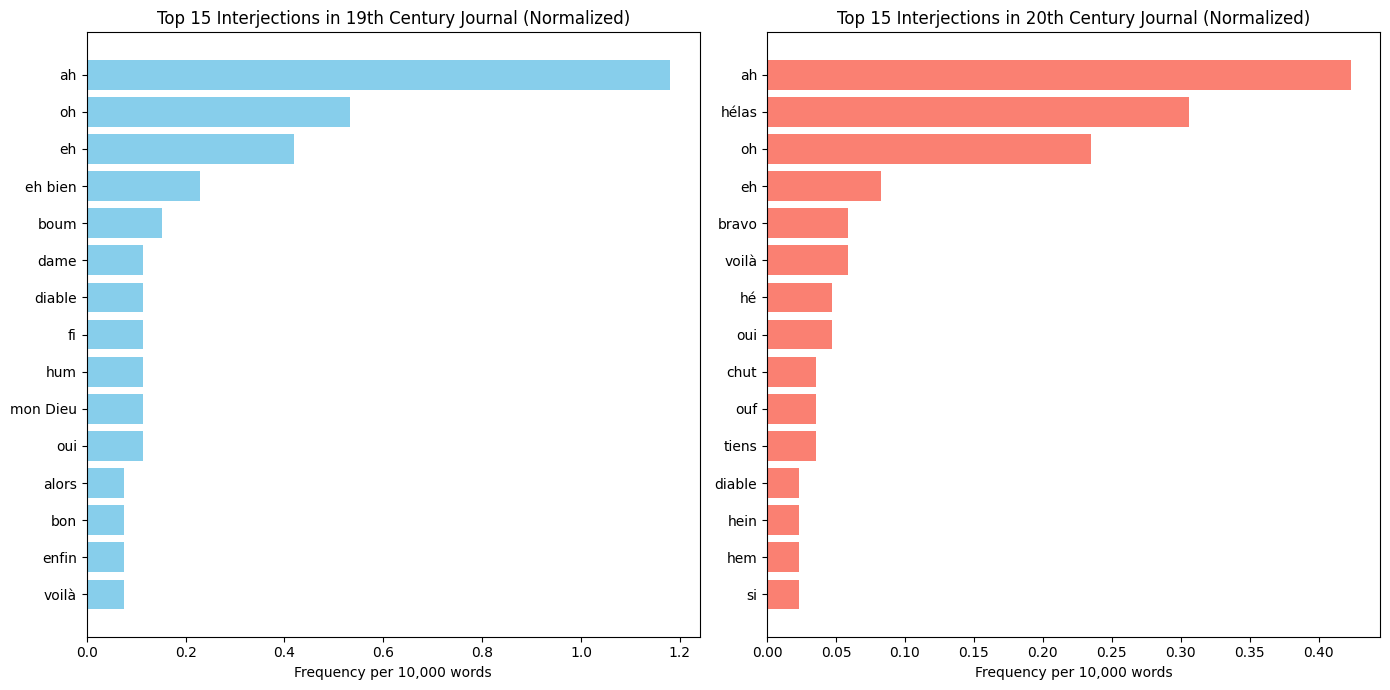

In [7]:
import os
import re
import csv
import matplotlib.pyplot as plt
from collections import Counter

# 读取感叹词字典
def load_interjections(dictionary_path):
    interjections = []
    with open(dictionary_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        next(reader)  # 跳过头行
        for row in reader:
            if row:
                interjections.append(row[0].strip())  # 获取第一列并去除多余的空格
    return interjections

# 统计感叹词频率
def count_interjections(corpus_path, interjections):
    counter = Counter()
    total_words = 0
    
    for root, dirs, files in os.walk(corpus_path):
        for file in files:
            if file.endswith('.txt'):
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    text = f.read().lower()
                    words = text.split()
                    total_words += len(words)
                    
                    for word in interjections:
                        # 使用正则表达式匹配整个感叹词
                        regex = r'(?<!\w)\b{}\b\s*!'.format(re.escape(word.lower()))
                        
                        matches = re.findall(regex, text)
                        
                        # 增加匹配到的感叹词数量
                        counter[word] += len(matches)
    
    return counter, total_words

# 绘制标准化频率的柱状图
def plot_normalized_frequencies(counter_19, counter_20, total_words_19, total_words_20, top_n=15):
    # 标准化为每10,000字的频率
    normalized_19 = {word: (count / total_words_19) * 10000 for word, count in counter_19.items()}
    normalized_20 = {word: (count / total_words_20) * 10000 for word, count in counter_20.items()}
    
    common_19 = Counter(normalized_19).most_common(top_n)
    common_20 = Counter(normalized_20).most_common(top_n)
    
    # 检查是否有足够的数据绘制图表
    if not common_19 or not common_20:
        print("没有足够的数据来绘制图表。请检查感叹词列表和语料库内容。")
        return

    labels_19, counts_19 = zip(*common_19)
    labels_20, counts_20 = zip(*common_20)
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    
    ax[0].barh(labels_19, counts_19, color='skyblue')
    ax[0].set_title('Top 15 Interjections in 19th Century Journal (Normalized)')
    ax[0].invert_yaxis()
    ax[0].set_xlabel('Frequency per 10,000 words')
    
    ax[1].barh(labels_20, counts_20, color='salmon')
    ax[1].set_title('Top 15 Interjections in 20th Century Journal (Normalized)')
    ax[1].invert_yaxis()
    ax[1].set_xlabel('Frequency per 10,000 words')
    
    plt.tight_layout()
    plt.show()

# 主程序
if __name__ == "__main__":
    interjections_path = 'interjection_stat.csv'  # 替换为感叹词字典文件的路径
    corpus_19_theatre_path = 'Journal/19'  # 替换为19世纪théatre语料库路径
    corpus_20_theatre_path = 'Journal/20'  # 替换为20世纪théatre语料库路径
    
    # 读取感叹词字典
    interjections = load_interjections(interjections_path)
    
    # 统计感叹词在19世纪和20世纪théatre语料库中的频率
    counter_19, total_words_19 = count_interjections(corpus_19_theatre_path, interjections)
    counter_20, total_words_20 = count_interjections(corpus_20_theatre_path, interjections)
    
    # 绘制标准化频率的柱状图
    plot_normalized_frequencies(counter_19, counter_20, total_words_19, total_words_20)


### Normalisation: Journal

### 感叹词的多样性

Unique interjection counts:
J_Frequency_19th: 28
J_Frequency_20th: 36
T_Frequency_19th: 70
T_Frequency_20th: 56


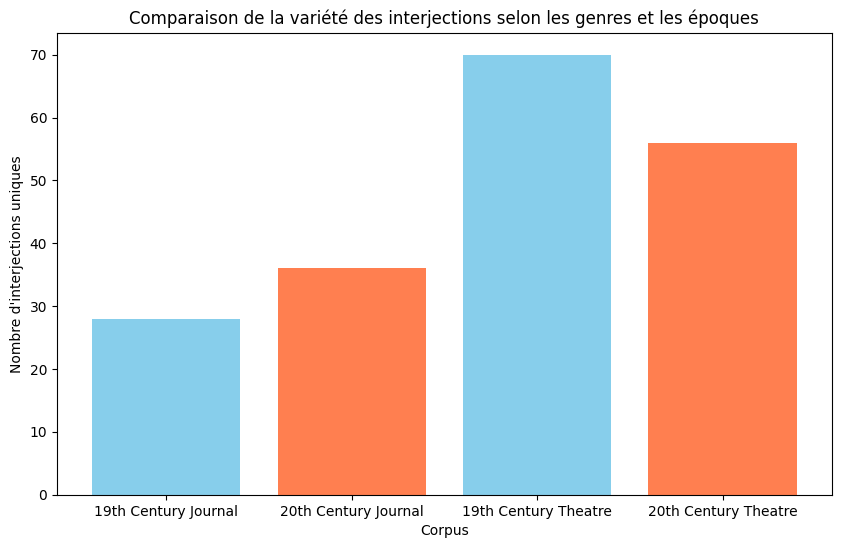

In [1]:
import pandas as pd

# 读取CSV文件
file_path = 'New_interjection_stat_with_frequency_centuries.csv'  # 请替换为你的本地文件路径
df = pd.read_csv(file_path)

# 定义函数统计感叹词的种类数
def count_unique_interjections(df, columns):
    unique_counts = {}
    for column in columns:
        # 统计频率大于0的感叹词种类数
        unique_interjections = df[df[column] > 0]['Interjection'].nunique()
        unique_counts[column] = unique_interjections
    return unique_counts

# 列出需要统计的语料库列
columns = ['J_Frequency_19th', 'J_Frequency_20th', 'T_Frequency_19th', 'T_Frequency_20th']

# 统计感叹词种类数
unique_interjection_counts = count_unique_interjections(df, columns)

# 打印统计结果
print("Unique interjection counts:")
for corpus, count in unique_interjection_counts.items():
    print(f"{corpus}: {count}")

# 可视化统计结果（可选）
import matplotlib.pyplot as plt

# 准备绘图数据
categories = ['19th Century Journal', '20th Century Journal', '19th Century Theatre', '20th Century Theatre']
counts = [unique_interjection_counts['J_Frequency_19th'], unique_interjection_counts['J_Frequency_20th'],
          unique_interjection_counts['T_Frequency_19th'], unique_interjection_counts['T_Frequency_20th']]

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['skyblue', 'coral', 'skyblue', 'coral'])
plt.title('Comparaison de la variété des interjections selon les genres et les époques')
plt.xlabel('Corpus')
plt.ylabel("Nombre d'interjections uniques")
plt.show()


In [2]:
def count_standardized_unique_interjections(df, columns, word_counts):
    unique_counts = {}
    for column, total_words in zip(columns, word_counts):
        # 统计感叹词种类并进行标准化
        unique_interjections = df[df[column] > 0]['Interjection'].nunique()
        unique_counts[column] = (unique_interjections / total_words) * 10000
    return unique_counts

# 语料库的总字数
word_counts = [262460, 303815, 304333, 218290]  # 19世纪报刊、20世纪报刊、19世纪戏剧、20世纪戏剧

# 统计标准化后的感叹词种类数
standardized_counts = count_standardized_unique_interjections(df, columns, word_counts)

# 打印标准化后的统计结果
print("Standardized Unique Interjection counts (per 10,000 words):")
for corpus, count in standardized_counts.items():
    print(f"{corpus}: {count}")


Standardized Unique Interjection counts (per 10,000 words):
J_Frequency_19th: 1.0668292311209326
J_Frequency_20th: 1.1849316195711206
T_Frequency_19th: 2.3001120483154964
T_Frequency_20th: 2.565394658481836


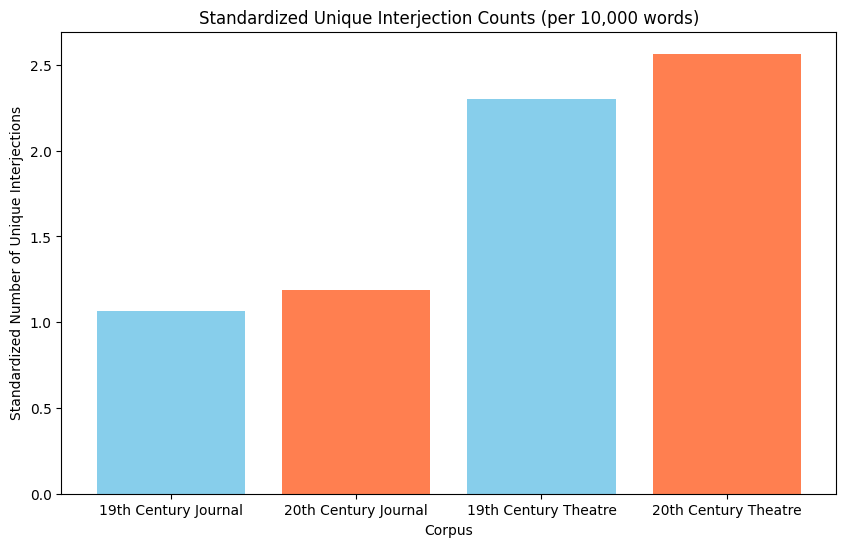

In [3]:
import matplotlib.pyplot as plt

# 准备绘图数据
categories = ['19th Century Journal', '20th Century Journal', '19th Century Theatre', '20th Century Theatre']
counts = [standardized_counts['J_Frequency_19th'], standardized_counts['J_Frequency_20th'],
          standardized_counts['T_Frequency_19th'], standardized_counts['T_Frequency_20th']]

# 绘制标准化结果的柱状图
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['skyblue', 'coral', 'skyblue', 'coral'])
plt.title('Standardized Unique Interjection Counts (per 10,000 words)')
plt.xlabel('Corpus')
plt.ylabel('Standardized Number of Unique Interjections')
plt.show()



### Concordance

In [ ]:
import os
import re

def print_concordance(corpus_path, interjections, context_size=50, max_concordances=10):
    """
    打印感叹词的concordance（上下文），用于分析感叹词的用法。
    
    :param corpus_path: 语料库路径
    :param interjections: 感叹词列表
    :param context_size: 每个感叹词前后文的字符数
    :param max_concordances: 每个感叹词最大打印的Concordance数量
    """
    for word in interjections:
        print(f"Concordances for '{word}':\n{'-'*50}")
        concordances_found = 0

        for root, dirs, files in os.walk(corpus_path):
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        text = f.read().lower()
                        
                        # 使用正则表达式匹配整个感叹词，并获取上下文
                        regex = r'(?<!\w)\b{}\b\s*!'.format(re.escape(word.lower()))
                        
                        for match in re.finditer(regex, text):
                            start = max(0, match.start() - context_size)
                            end = min(len(text), match.end() + context_size)
                            concordance_text = text[start:end]
                            print(concordance_text.strip())
                            concordances_found += 1
                            if concordances_found >= max_concordances:
                                break
                        if concordances_found >= max_concordances:
                            break
        if concordances_found == 0:
            print("No concordances found.")
        print("\n")

# 主程序
if __name__ == "__main__":
    # 手动指定的感叹词列表，包括 "Gare"
    interjections = ['oui', 'ciel', 'alors', 'allez', 'eh bien', 'ah']
    
    # 替换为实际的语料库路径
    corpus_path = 'Theatre/19'
    
    # 打印concordance进行具体的分析
    print_concordance(corpus_path, interjections, context_size=50, max_concordances=10)


Concordances for 'oui':
--------------------------------------------------
me raquin.
							lui !
							michaud.
							eh oui ! quel joli couple ça ferait !... ma vieille amie,
. assieds-toi là.
							francis.
							ah bien, oui ! j'ai mangé à montpellier, mangé comme quatre...
vrant la porte et restant sur le seuil.
							eh oui ! c'est bien madeleine... 		gaiement.puis-je entrer
le châtiment du crime ?
							le choeur.
							oui !
							électre.
							je sais, je sais : quelqu'
i ?
							alexandre dumas, vivement.
							oh ! oui ! oui!
							le diable.
							[note : françois bu
alexandre dumas, vivement.
							oh ! oui ! oui!
							le diable.
							[note : françois buloz (
mène à la balançoire.
							toutes.
							oui, oui ! à la balançoire !
							de pontmartin.
							[n
a femme de chambre.
							fontevrault.
							ah oui ! paul de kock, par exemple... ou bien pigault-lebr
rais fortune.
							jospeh de maistre.
							ah oui ! toujours votre rêve ! 
							fo

In [ ]:
import os
import re

def print_concordance(corpus_path, interjections, context_size=50, max_concordances=10):
    """
    打印感叹词的concordance（上下文），用于分析感叹词的用法。
    
    :param corpus_path: 语料库路径
    :param interjections: 感叹词列表
    :param context_size: 每个感叹词前后文的字符数
    :param max_concordances: 每个感叹词最大打印的Concordance数量
    """
    for word in interjections:
        print(f"Concordances for '{word}':\n{'-'*50}")
        concordances_found = 0

        for root, dirs, files in os.walk(corpus_path):
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        text = f.read().lower()
                        
                        # 使用正则表达式匹配整个感叹词
                        regex = r'(?<!\w)\b{}\b\s*!'.format(re.escape(word.lower()))
                        
                        matches = re.finditer(regex, text)
                        
                        for match in matches:
                            start = max(0, match.start() - context_size)
                            end = min(len(text), match.end() + context_size)
                            concordance_text = text[start:end].strip()
                            
                            # 将上下文的关键部分（感叹词）加粗显示
                            highlighted = re.sub(rf'\b{re.escape(word.lower())}\b', word.upper(), concordance_text)
                            
                            # 格式化输出
                            print(f"...{highlighted}...")
                            concordances_found += 1
                            if concordances_found >= max_concordances:
                                break
                        if concordances_found >= max_concordances:
                            break
        if concordances_found == 0:
            print("No concordances found.")
        print("\n")

# 主程序
if __name__ == "__main__":
    # 手动指定的感叹词列表，包括 "Gare"
    interjections = ['oui', 'ciel', 'alors', 'allez', 'eh bien','ah']
    
    # 替换为实际的语料库路径
    corpus_path = 'Theatre/19'
    
    # 打印concordance进行具体的分析
    print_concordance(corpus_path, interjections, context_size=50, max_concordances=10)


Concordances for 'oui':
--------------------------------------------------
...me raquin.
							lui !
							michaud.
							eh OUI ! quel joli couple ça ferait !... ma vieille amie,...
.... assieds-toi là.
							francis.
							ah bien, OUI ! j'ai mangé à montpellier, mangé comme quatre......
...vrant la porte et restant sur le seuil.
							eh OUI ! c'est bien madeleine... 		gaiement.puis-je entrer...
...le châtiment du crime ?
							le choeur.
							OUI !
							électre.
							je sais, je sais : quelqu'...
...i ?
							alexandre dumas, vivement.
							oh ! OUI ! OUI!
							le diable.
							[note : françois bu...
...alexandre dumas, vivement.
							oh ! OUI ! OUI!
							le diable.
							[note : françois buloz (...
...mène à la balançoire.
							toutes.
							OUI, OUI ! à la balançoire !
							de pontmartin.
							[n...
...a femme de chambre.
							fontevrault.
							ah OUI ! paul de kock, par exemple... ou bien pigault-lebr...
...rais fortune.
							jospeh de maistr

In [ ]:
import os
import re

# 定义粉色字体的ANSI转义码
PINK = '\033[95m'
RESET = '\033[0m'  # 重置颜色

def print_concordance(corpus_path, interjections, context_size=50, max_concordances=10):
    """
    打印感叹词的concordance（上下文），并将感叹词显示为粉色。
    
    :param corpus_path: 语料库路径
    :param interjections: 感叹词列表
    :param context_size: 每个感叹词前后文的字符数
    :param max_concordances: 每个感叹词最大打印的Concordance数量
    """
    for word in interjections:
        print(f"Concordances for '{word}':\n{'-'*50}")
        concordances_found = 0

        for root, dirs, files in os.walk(corpus_path):
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    with open(file_path, 'r', encoding='utf-8') as f:
                        text = f.read().lower()

                        # 使用正则表达式匹配感叹词
                        regex = r'(?<!\w)\b{}\b\s*!'.format(re.escape(word.lower()))
                        
                        for match in re.finditer(regex, text):
                            start = max(0, match.start() - context_size)
                            end = min(len(text), match.end() + context_size)
                            concordance_text = text[start:end]

                            # 将感叹词标记为粉色
                            colored_text = (concordance_text[:match.start()-start] + 
                                            PINK + text[match.start():match.end()] + RESET + 
                                            concordance_text[match.end()-start:])
                            
                            # 规范输出，每行最多显示context_size*2+len(word)个字符
                            lines = [colored_text[i:i+context_size*2+len(word)] for i in range(0, len(colored_text), context_size*2+len(word))]
                            for line in lines:
                                print(line.strip())
                            
                            print('-' * 50)  # 输出分隔符
                            concordances_found += 1
                            if concordances_found >= max_concordances:
                                break
                if concordances_found >= max_concordances:
                    break
        if concordances_found == 0:
            print("No concordances found.")
        print("\n")

# 主程序
if __name__ == "__main__":
    # 手动指定的感叹词列表，包括 "Gare"
    interjections = ['oui', 'ciel', 'alors', 'allez', 'eh bien','ah']
    
    # 替换为实际的语料库路径
    corpus_path = 'Theatre/19'
    
    # 打印concordance进行具体的分析
    print_concordance(corpus_path, interjections, context_size=50, max_concordances=10)


Concordances for 'oui':
--------------------------------------------------
me raquin.
							lui !
							michaud.
							eh oui ! quel joli couple ça ferait !... ma vie
ille amie,
--------------------------------------------------
. assieds-toi là.
							francis.
							ah bien, oui ! j'ai mangé à montpellier, mangé comme
quatre...
--------------------------------------------------
vrant la porte et restant sur le seuil.
							eh oui ! c'est bien madeleine... 		gaiement.pui
s-je entrer
--------------------------------------------------
le châtiment du crime ?
							le choeur.
							oui !
							électre.
							je sais, je sai
s : quelqu'
--------------------------------------------------
i ?
							alexandre dumas, vivement.
							oh ! oui ! oui!
							le diable.
							[note :
françois bu
--------------------------------------------------
alexandre dumas, vivement.
							oh ! oui ! oui!
							le diable.
							[note : franço
is buloz (
----------------------------------------

### Théatre 


### Journal

In [16]:
import os
import re
import pandas as pd

# 读取CSV文件
df = pd.read_csv('interjection_stat.csv')

# 确保列名正确，如果有空格，可以使用 df.columns.str.strip() 去掉空格
df.columns = df.columns.str.strip()

# 函数来统计感叹词的出现次数
def count_occurrences(word, corpus_path):
    count = 0
    regex = r'(?<!\w)\b{}\b\s*!'.format(re.escape(word.lower()))
    for root, dirs, files in os.walk(corpus_path):
        for file in files:
            if file == ".DS_Store":
                continue  # 跳过 .DS_Store 文件
            file_path = os.path.join(root, file)
            with open(file_path, 'r', encoding='utf-8') as f:
                text = f.read().lower()
            count += len(re.findall(regex, text))
    return count

# 定义19世纪和20世纪戏剧语料库路径
corpus_19_journal_path = 'Journal/19'  # 替换为19世纪théatre语料库路径
corpus_20_journal_path = 'Journal/20'  # 替换为20世纪théatre语料库路径
corpus_19_theatre_path = 'Theatre/19'  # 替换为19世纪théatre语料库路径
corpus_20_theatre_path = 'Theatre/20'  # 替换为20世纪théatre语料库路径

# 分别统计19世纪和20世纪的感叹词使用频率
df['J_Frequency_19th'] = df['Interjection'].apply(lambda word: count_occurrences(word, corpus_19_journal_path))
df['J_Frequency_20th'] = df['Interjection'].apply(lambda word: count_occurrences(word, corpus_20_journal_path))
df['T_Frequency_19th'] = df['Interjection'].apply(lambda word: count_occurrences(word, corpus_19_theatre_path))
df['T_Frequency_20th'] = df['Interjection'].apply(lambda word: count_occurrences(word, corpus_20_theatre_path))


# 将统计结果保存回原始数据框中
df.to_csv('New_interjection_stat_with_frequency_centuries.csv', index=False)


# 导出到文本文件

print(df.head())
# 导出到 CSV 文件
df.to_csv('output_journal.csv', index=False)


  Interjection voyelle openness  frequence  J_Frequency_19th  \
0           ah       ɑ        4        NaN                31   
1       ah bon       ɑ        4        NaN                 0   
2          ahi       a        4        NaN                 0   
3          aïe       a        4        NaN                 0   
4        allez       a        4        NaN                 1   

   J_Frequency_20th  T_Frequency_19th  T_Frequency_20th  
0                36               539               257  
1                 0                 0                 0  
2                 0                 0                 0  
3                 1                18                 1  
4                 1                14                 3  


In [ ]:
import numpy as np
import scipy.stats as stats

# 移除包含 NaN 或 inf 的行
df_cleaned = df[np.isfinite(df['J_Frequency_19th']) & np.isfinite(df['openness'])]

# 重新计算相关性
correlation_19th_journal, p_value_19th_journal = stats.pearsonr(df_cleaned['J_Frequency_19th'], df_cleaned['openness'])

# 处理其他列
df_cleaned = df[np.isfinite(df['J_Frequency_20th']) & np.isfinite(df['openness'])]
correlation_20th_journal, p_value_20th_journal = stats.pearsonr(df_cleaned['J_Frequency_20th'], df_cleaned['openness'])

df_cleaned = df[np.isfinite(df['T_Frequency_19th']) & np.isfinite(df['openness'])]
correlation_19th_theatre, p_value_19th_theatre = stats.pearsonr(df_cleaned['T_Frequency_19th'], df_cleaned['openness'])

df_cleaned = df[np.isfinite(df['T_Frequency_20th']) & np.isfinite(df['openness'])]
correlation_20th_theatre, p_value_20th_theatre = stats.pearsonr(df_cleaned['T_Frequency_20th'], df_cleaned['openness'])

print(f"19世纪报刊相关性: {correlation_19th_journal}, p-value: {p_value_19th_journal}")
print(f"20世纪报刊相关性: {correlation_20th_journal}, p-value: {p_value_20th_journal}")
print(f"19世纪戏剧相关性: {correlation_19th_theatre}, p-value: {p_value_19th_theatre}")
print(f"20世纪戏剧相关性: {correlation_20th_theatre}, p-value: {p_value_20th_theatre}")


19世纪报刊相关性: 0.058545636068069985, p-value: 0.3517994869635738
20世纪报刊相关性: 0.05284010327615508, p-value: 0.4007792344485522
19世纪戏剧相关性: 0.058209114972781695, p-value: 0.35457933564715893
20世纪戏剧相关性: 0.04809582860430025, p-value: 0.444451342130687


In [ ]:
import pandas as pd

# 读取标注好的感叹词列表
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 子语料库的总字数
word_counts = {
    'J_Frequency_19th': 262460,
    'J_Frequency_20th': 303815,
    'T_Frequency_19th': 304333,
    'T_Frequency_20th': 218290
}

# 标准化每个感叹词在每个子语料库中的频率
for corpus, total_words in word_counts.items():
    column_name = f'{corpus}_Freq_Standardized'
    df[column_name] = (df[corpus] / total_words) * 10000

# 将感叹词按元音开口程度分组
df['Vowel_Group'] = df['openness'].apply(lambda x: 'Open' if x == 4 else ('Central' if x == 3 else 'Other'))

# 统计每组元音的标准化频率总和
frequency_data = {
    'Open_Vowels': df[df['Vowel_Group'] == 'Open'][[f'{corpus}_Freq_Standardized' for corpus in word_counts]].sum().sum(),
    'Central_Vowels': df[df['Vowel_Group'] == 'Central'][[f'{corpus}_Freq_Standardized' for corpus in word_counts]].sum().sum(),
    'Other_Vowels': df[df['Vowel_Group'] == 'Other'][[f'{corpus}_Freq_Standardized' for corpus in word_counts]].sum().sum()
}

# 打印每个组别的标准化频率总和
print("Frequency Data:")
for group, freq in frequency_data.items():
    print(f"{group}: {freq}")


Frequency Data:
Open_Vowels: 0.0
Central_Vowels: 0.0
Other_Vowels: 106.21449107855577


In [ ]:
import pandas as pd

# 读取标注好的感叹词列表
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 检查并转换openness列为数值类型，清除可能存在的空格和非数字字符
df['openness'] = pd.to_numeric(df['openness'].str.strip(), errors='coerce')

# 确保openness列没有NaN值
if df['openness'].isna().any():
    print("Some openness values could not be converted to numbers. Check the data for errors.")

# 正确的分组逻辑，确保openness值为4的属于'Open'
df['Vowel_Group'] = df['openness'].apply(lambda x: 'Open' if x == 4 else ('Central' if x == 3 else 'Other'))

# 打印以确认分组正确
print(df[['Interjection', 'openness', 'Vowel_Group']].head(80))


Some openness values could not be converted to numbers. Check the data for errors.
            Interjection  openness Vowel_Group
0                     ah       4.0        Open
1                 ah bon       4.0        Open
2                    ahi       4.0        Open
3                    aïe       4.0        Open
4                  allez       4.0        Open
..                   ...       ...         ...
75  doucement les basses       1.0       Other
76            doux Jésus       1.0       Other
77              du balai       1.0       Other
78              du calme       1.0       Other
79               du nerf       1.0       Other

[80 rows x 3 columns]


In [48]:
print(df['openness'].dtype)


object


In [52]:
df['openness'] = pd.to_numeric(df['openness'], errors='coerce')
print(df['openness'].dtype)

float64


In [53]:
df['Vowel_Group'] = df['openness'].apply(lambda x: 'Open' if x == 4 else ('Central' if x == 3 else 'Other'))
print(df[['Interjection', 'openness', 'Vowel_Group']])


    Interjection  openness Vowel_Group
0             ah       4.0        Open
1         ah bon       4.0        Open
2            ahi       4.0        Open
3            aïe       4.0        Open
4          allez       4.0        Open
..           ...       ...         ...
255        wouaf       4.0        Open
256        youpi       1.0       Other
257          zou       1.0       Other
258          zut       1.0       Other
259         zyva       1.0       Other

[260 rows x 3 columns]


In [54]:
#计算每个子语料库中的标准化频率: 按照子语料库的总字数来标准化每个感叹词的频率：




# 子语料库的总字数
word_counts = {
    'J_Frequency_19th': 262460,
    'J_Frequency_20th': 303815,
    'T_Frequency_19th': 304333,
    'T_Frequency_20th': 218290
}

# 标准化每个感叹词在每个子语料库中的频率
for corpus, total_words in word_counts.items():
    column_name = f'{corpus}_Freq_Standardized'
    df[column_name] = (df[corpus] / total_words) * 10000

# 检查标准化后的列是否正确创建
print(df[['Interjection', 'Vowel_Group'] + [f'{corpus}_Freq_Standardized' for corpus in word_counts]].head(20))


      Interjection Vowel_Group  J_Frequency_19th_Freq_Standardized  \
0               ah        Open                            1.181132   
1           ah bon        Open                            0.000000   
2              ahi        Open                            0.000000   
3              aïe        Open                            0.000000   
4            allez        Open                            0.038101   
5            alors        Open                            0.076202   
6           atchou        Open                            0.000000   
7          atchoum        Open                            0.000000   
8        attention        Open                            0.000000   
9       au meurtre       Other                            0.000000   
10  au nom du ciel       Other                            0.000000   
11      au secours       Other                            0.000000   
12       au voleur       Other                            0.000000   
13       aux armes  

In [55]:
# 检查Open和Central组的标准化频率
open_vowel_freqs = df[df['Vowel_Group'] == 'Open']['J_Frequency_19th_Freq_Standardized']
central_vowel_freqs = df[df['Vowel_Group'] == 'Central']['J_Frequency_19th_Freq_Standardized']

print("Open Vowels Frequencies (Standardized):")
print(open_vowel_freqs)
print("\nCentral Vowels Frequencies (Standardized):")
print(central_vowel_freqs)


Open Vowels Frequencies (Standardized):
0      1.181132
1      0.000000
2      0.000000
3      0.000000
4      0.038101
         ...   
248    0.000000
250    0.000000
253    0.000000
254    0.000000
255    0.000000
Name: J_Frequency_19th_Freq_Standardized, Length: 74, dtype: float64

Central Vowels Frequencies (Standardized):
30     0.000000
35     0.000000
36     0.000000
48     0.000000
106    0.000000
113    0.000000
116    0.000000
119    0.000000
136    0.000000
141    0.000000
145    0.000000
148    0.114303
149    0.000000
150    0.000000
154    0.000000
155    0.000000
201    0.000000
203    0.000000
217    0.000000
218    0.000000
219    0.000000
227    0.000000
243    0.038101
244    0.000000
245    0.000000
246    0.000000
247    0.000000
252    0.076202
Name: J_Frequency_19th_Freq_Standardized, dtype: float64


In [45]:
import pandas as pd
import scipy.stats as stats

# 读取数据
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 子语料库的总字数
word_count_19th_Journal = 262460

# 标准化每个感叹词在19世纪报刊子语料库中的频率
df['J_Frequency_19th_Freq_Standardized'] = (df['J_Frequency_19th'] / word_count_19th_Journal) * 10000

# 将感叹词按元音开口程度分组
df['Vowel_Group'] = df['openness'].apply(lambda x: 'Open' if x == 4 else ('Central' if x == 3 else 'Other'))

# 统计每组元音的标准化频率总和
frequency_data_19th_Journal = {
    'Open_Vowels': df[df['Vowel_Group'] == 'Open']['J_Frequency_19th_Freq_Standardized'].sum(),
    'Central_Vowels': df[df['Vowel_Group'] == 'Central']['J_Frequency_19th_Freq_Standardized'].sum(),
    'Other_Vowels': df[df['Vowel_Group'] == 'Other']['J_Frequency_19th_Freq_Standardized'].sum()
}

# 打印每个组别的频率
print("Frequency Data for 19th Century Journal (Standardized):")
for group, freq in frequency_data_19th_Journal.items():
    print(f"{group}: {freq}")

# 构建卡方检验的频率表
observed = [frequency_data_19th_Journal['Open_Vowels'], 
            frequency_data_19th_Journal['Central_Vowels'], 
            frequency_data_19th_Journal['Other_Vowels']]

# 假设期望值是每个组别频率的均值（均匀分布的假设）
expected = [sum(observed) / 3] * 3

# 进行卡方检验
chi2, p = stats.chisquare(observed, f_exp=expected)

print(f"Chi2: {chi2}, p-value: {p}")


Frequency Data for 19th Century Journal (Standardized):
Open_Vowels: 0.0
Central_Vowels: 0.0
Other_Vowels: 4.000609616703498
Chi2: 8.001219233406996, p-value: 0.018304476771984466


In [43]:
# 统计每组元音的标准化频率总和
frequency_data = {
    'Open_Vowels': df[df['Vowel_Group'] == 'Open'][[f'{corpus}_Freq_Standardized' for corpus in word_counts]].sum().sum(),
    'Central_Vowels': df[df['Vowel_Group'] == 'Central'][[f'{corpus}_Freq_Standardized' for corpus in word_counts]].sum().sum(),
    'Other_Vowels': df[df['Vowel_Group'] == 'Other'][[f'{corpus}_Freq_Standardized' for corpus in word_counts]].sum().sum()
}

# 打印每个组别的频率
print("Frequency Data (Standardized):")
for group, freq in frequency_data.items():
    print(f"{group}: {freq}")


Frequency Data (Standardized):
Open_Vowels: 39.71045472590083
Central_Vowels: 7.157370868579628
Other_Vowels: 59.346665484075295


In [44]:
# 构建卡方检验的频率表
data = pd.DataFrame({
    'Open_Vowels': [frequency_data['Open_Vowels'], frequency_data['Open_Vowels'] / len(df)],
    'Central_Vowels': [frequency_data['Central_Vowels'], frequency_data['Central_Vowels'] / len(df)],
    'Other_Vowels': [frequency_data['Other_Vowels'], frequency_data['Other_Vowels'] / len(df)]
}, index=['Interjections', 'Expected'])

# 进行卡方检验
chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi2: {chi2}, p-value: {p}")

# 输出结果
print("Frequency Data (Standardized):")
print(data)


Chi2: 1.1526050429133545e-31, p-value: 1.0
Frequency Data (Standardized):
               Open_Vowels  Central_Vowels  Other_Vowels
Interjections    39.710455        7.157371     59.346665
Expected          0.152733        0.027528      0.228256


## Fisher检验


In [56]:
import pandas as pd
import scipy.stats as stats

# 读取标注好的感叹词数据
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 创建二元变量 High_Openness 和 Interjection_Present
df['High_Openness'] = df['openness'].apply(lambda x: 1 if x == 4 else 0)
df['Interjection_Present'] = df['J_Frequency_19th'].apply(lambda x: 1 if x > 0 else 0)

# 构建列联表
contingency_table = pd.crosstab(df['High_Openness'], df['Interjection_Present'])

# 进行 Fisher 精确检验
oddsratio, p_value = stats.fisher_exact(contingency_table)

print("Contingency Table:")
print(contingency_table)
print(f"Fisher Exact Test p-value: {p_value}")


ValueError: The input `table` must be of shape (2, 2).

In [57]:
import pandas as pd

# 读取数据
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 二分处理：高开口度元音（Open Vowels）和感叹词的存在性
df['High_Openness'] = df['openness'].apply(lambda x: 'High' if x == 4 else 'Low')
df['Interjection_Present'] = df['J_Frequency_19th'].apply(lambda x: 'Present' if x > 0 else 'Absent')

# 创建2x2列联表
contingency_table = pd.crosstab(df['High_Openness'], df['Interjection_Present'])

# 将列联表保存为一个新的CSV文件
contingency_table.to_csv('contingency_table.csv', index=True)

print("Contingency table has been created and saved as 'contingency_table.csv'.")
print(contingency_table)


Contingency table has been created and saved as 'contingency_table.csv'.
Interjection_Present  Absent  Present
High_Openness                        
Low                      232       28


In [76]:
import pandas as pd

# 读取数据
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 定义子语料库的总字数（假设已经统计好了）
word_counts = {
    'J_Frequency_19th': 262460,
    'J_Frequency_20th': 303815,
    'T_Frequency_19th': 304333,
    'T_Frequency_20th': 218290
}

# 标准化每个感叹词在每个子语料库中的频率
for corpus, total_words in word_counts.items():
    column_name = f'{corpus}_Freq_Standardized'
    df[column_name] = (df[corpus] / total_words) * 10000

# 检查标准化后的列是否正确创建
print(df.head())


  Interjection voyelle openness  J_Frequency_19th  J_Frequency_20th  \
0           ah       ɑ       4                 31                15   
1       ah bon       ɑ       4                  0                 0   
2          ahi       a       4                  0                 0   
3          aïe       a       4                  0                 1   
4        allez       a       4                  1                 0   

   T_Frequency_19th  T_Frequency_20th  J_Frequency_19th_Freq_Standardized  \
0               539               257                            1.181132   
1                 0                 0                            0.000000   
2                 0                 0                            0.000000   
3                18                 1                            0.000000   
4                14                 3                            0.038101   

   J_Frequency_20th_Freq_Standardized  T_Frequency_19th_Freq_Standardized  \
0                            0.49

In [78]:
print(df.dtypes)  # 检查每一列的数据类型
print(df['openness'].unique())  # 检查唯一值，确认数据是否一致


Interjection                           object
voyelle                                object
openness                               object
J_Frequency_19th                        int64
J_Frequency_20th                        int64
T_Frequency_19th                        int64
T_Frequency_20th                        int64
J_Frequency_19th_Freq_Standardized    float64
J_Frequency_20th_Freq_Standardized    float64
T_Frequency_19th_Freq_Standardized    float64
T_Frequency_20th_Freq_Standardized    float64
dtype: object
['4 ' '2 ' '1 ' '3 ' '/']


In [79]:
import pandas as pd

# 假设 df 是已经加载的 DataFrame
# df = pd.read_csv('your_file.csv')

# 去掉 openness 列中包含 '/' 的行
df = df[df['openness'] != '/']

# 将 openness 列转换为数值型
df['openness'] = pd.to_numeric(df['openness'].str.strip(), errors='coerce')

# 检查转换结果
print("转换后的 openness 列唯一值：")
print(df['openness'].unique())

# 检查转换后的数据类型
print("数据类型检查：")
print(df.dtypes)

# 重新应用 High_Openness 分组
df['High_Openness'] = df['openness'].apply(lambda x: 'High' if x in [3,4] else 'Low')

# 检查 High_Openness 的分组情况
print("检查 High_Openness 的分组情况：")
print(df[['Interjection', 'voyelle', 'openness', 'High_Openness']].head(10))


转换后的 openness 列唯一值：
[4 2 1 3]
数据类型检查：
Interjection                           object
voyelle                                object
openness                                int64
J_Frequency_19th                        int64
J_Frequency_20th                        int64
T_Frequency_19th                        int64
T_Frequency_20th                        int64
J_Frequency_19th_Freq_Standardized    float64
J_Frequency_20th_Freq_Standardized    float64
T_Frequency_19th_Freq_Standardized    float64
T_Frequency_20th_Freq_Standardized    float64
dtype: object
检查 High_Openness 的分组情况：
  Interjection voyelle  openness High_Openness
0           ah       ɑ         4          High
1       ah bon       ɑ         4          High
2          ahi       a         4          High
3          aïe       a         4          High
4        allez       a         4          High
5        alors       a         4          High
6       atchou       a         4          High
7      atchoum       a         4          

In [81]:



# 对于每个子语料库分别生成列联表和进行 Fisher 检验
for corpus in ['J_Frequency_19th_Freq_Standardized', 'J_Frequency_20th_Freq_Standardized', 
               'T_Frequency_19th_Freq_Standardized', 'T_Frequency_20th_Freq_Standardized']:
    df['Interjection_Present'] = df[corpus].apply(lambda x: 'Present' if x > 0 else 'Absent')
    
    # 创建2x2列联表
    contingency_table = pd.crosstab(df['High_Openness'], df['Interjection_Present'])
    
    # 打印列联表
    print(f"Contingency Table for {corpus}:")
    print(contingency_table)
    
    # 进行 Fisher 精确检验
    if contingency_table.shape == (2, 2):
        oddsratio, p_value = stats.fisher_exact(contingency_table)
        print(f"Fisher Exact Test p-value for {corpus}: {p_value}")
    else:
        print(f"Contingency table for {corpus} is not 2x2. Fisher's exact test is not applicable.")
    
    print()


Contingency Table for J_Frequency_19th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                        
High                      89       13
Low                      138       15
Fisher Exact Test p-value for J_Frequency_19th_Freq_Standardized: 0.5407814842704186

Contingency Table for J_Frequency_20th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                        
High                      96        6
Low                      144        9
Fisher Exact Test p-value for J_Frequency_20th_Freq_Standardized: 1.0

Contingency Table for T_Frequency_19th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                        
High                      71       31
Low                      114       39
Fisher Exact Test p-value for T_Frequency_19th_Freq_Standardized: 0.39443227216590343

Contingency Table for T_Frequency_20th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                 

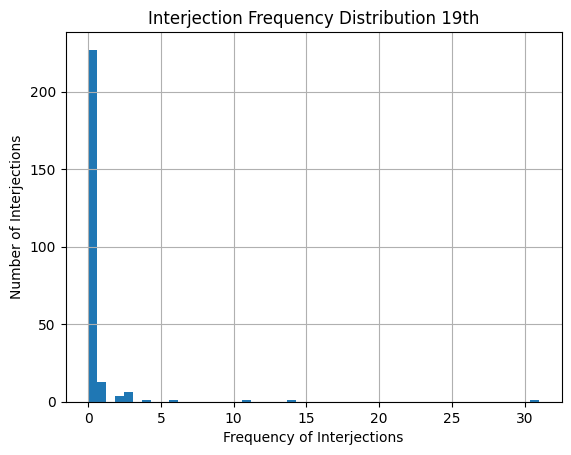

In [85]:
import matplotlib.pyplot as plt

# 绘制频率分布图
df['J_Frequency_19th'].hist(bins=50)
plt.xlabel('Frequency of Interjections')
plt.ylabel('Number of Interjections')
plt.title('Interjection Frequency Distribution 19th')
plt.show()


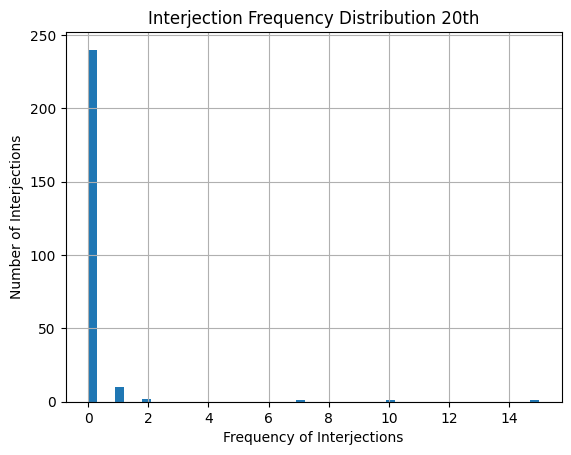

In [86]:
import matplotlib.pyplot as plt

# 绘制频率分布图
df['J_Frequency_20th'].hist(bins=50)
plt.xlabel('Frequency of Interjections')
plt.ylabel('Number of Interjections')
plt.title('Interjection Frequency Distribution 20th')
plt.show()

In [93]:
import pandas as pd
from scipy import stats

# 读取数据
df = pd.read_csv('interjection_stat_with_frequency_centuries.csv')

# 定义子语料库的总字数（假设已经统计好了）
word_counts = {
    'J_Frequency_19th': 262460,
    'J_Frequency_20th': 303815,
    'T_Frequency_19th': 304333,
    'T_Frequency_20th': 218290
}

# 设定最低频率阈值，保留至少1次出现的感叹词
frequency_threshold = 0.5

for corpus in ['J_Frequency_19th', 'J_Frequency_20th', 'T_Frequency_19th', 'T_Frequency_20th']:
    # 只筛选那些在至少一个语料库中频率达到阈值的感叹词
    df = df[(df[corpus] >= frequency_threshold) | (df[corpus] == 0)]

# 进行标准化：每个感叹词在每个子语料库中的频率标准化（每10,000词）
for corpus, total_words in word_counts.items():
    column_name = f'{corpus}_Freq_Standardized'
    df[column_name] = (df[corpus] / total_words) * 10000

# 去掉 openness 列中包含 '/' 的行
df = df[df['openness'] != '/']

# 将 openness 列转换为数值型
df['openness'] = pd.to_numeric(df['openness'].str.strip(), errors='coerce')

# 重新应用 High_Openness 分组
df['High_Openness'] = df['openness'].apply(lambda x: 'High' if x in [3,4] else 'Low')

# 对于每个子语料库分别生成列联表和进行 Fisher 检验
for corpus in ['J_Frequency_19th_Freq_Standardized', 'J_Frequency_20th_Freq_Standardized', 
               'T_Frequency_19th_Freq_Standardized', 'T_Frequency_20th_Freq_Standardized']:
    df['Interjection_Present'] = df[corpus].apply(lambda x: 'Present' if x > 0 else 'Absent')
    
    # 创建2x2列联表
    contingency_table = pd.crosstab(df['High_Openness'], df['Interjection_Present'])
    
    # 打印列联表
    print(f"Contingency Table for {corpus}:")
    print(contingency_table)
    
    # 进行 Fisher 精确检验
    if contingency_table.shape == (2, 2):
        oddsratio, p_value = stats.fisher_exact(contingency_table)
        print(f"Fisher Exact Test p-value for {corpus}: {p_value}")
    else:
        print(f"Contingency table for {corpus} is not 2x2. Fisher's exact test is not applicable.")


Contingency Table for J_Frequency_19th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                        
High                      89       13
Low                      138       15
Fisher Exact Test p-value for J_Frequency_19th_Freq_Standardized: 0.5407814842704186
Contingency Table for J_Frequency_20th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                        
High                      96        6
Low                      144        9
Fisher Exact Test p-value for J_Frequency_20th_Freq_Standardized: 1.0
Contingency Table for T_Frequency_19th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                        
High                      71       31
Low                      114       39
Fisher Exact Test p-value for T_Frequency_19th_Freq_Standardized: 0.39443227216590343
Contingency Table for T_Frequency_20th_Freq_Standardized:
Interjection_Present  Absent  Present
High_Openness                    